# DATA EXPLORATORY ANALYSIS PROYECTO 1

In [70]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np

In [4]:
#Importamos el DataSet

data = pd.read_csv('Datasets/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
#Empezamos la limpieza de datos
data.isnull().sum() #Mostramos todos los valores nulls

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [23]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)
data.dropna(subset=['Year','Publisher'],inplace=True) #Quitamos los datos que sean null
data.isnull().sum() #Nos cercioramos de que ya no existan los valores null en nuestro data set

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [24]:
#Analicemos con que tipos de datos estamos trabajando
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15945 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          15945 non-null  int64  
 1   Name          15945 non-null  object 
 2   Platform      15945 non-null  object 
 3   Year          15945 non-null  float64
 4   Genre         15945 non-null  object 
 5   Publisher     15945 non-null  object 
 6   NA_Sales      15945 non-null  float64
 7   EU_Sales      15945 non-null  float64
 8   JP_Sales      15945 non-null  float64
 9   Other_Sales   15945 non-null  float64
 10  Global_Sales  15945 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# Pregunta 1
Cuales son los generos de juego que mas se han hecho

In [85]:
genrescount = data['Genre'].value_counts().reset_index()
genrescount = genrescount.rename(columns={"index": "Genero", "Genre": "Cantidad"})
genrescount = genrescount.set_index("Genero")
genrescount

,Cantidad
Genero,
Action,3132
Sports,2266
Misc,1668
Role-Playing,1428
Shooter,1250
Adventure,1241
Racing,1205
Platform,865
Simulation,838


<AxesSubplot:xlabel='Genero'>

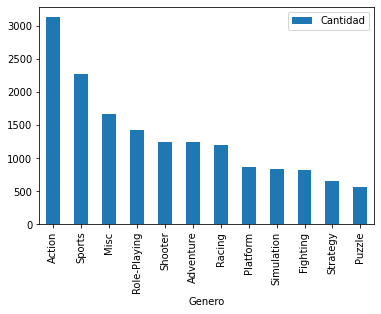

In [86]:
genrescount.to_csv("Datasets/genrescount.csv")
plot = genrescount.plot(kind='bar') #Mostramos los datos obtenidos
plot

# Pregunta 2
Que año tuvo el mayor numero de ventas a nivel mundial


In [27]:
yearsales = data.groupby(by=['Year'])['Global_Sales'].sum()
yearsales

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.30
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
Name: Global_Sales, dtype: float64

In [91]:

yearsales.head(5)

Year
1980.0    11.38
1981.0    35.77
1982.0    28.86
1983.0    16.79
1984.0    50.36
Name: Global_Sales, dtype: float64

<AxesSubplot:xlabel='Year'>

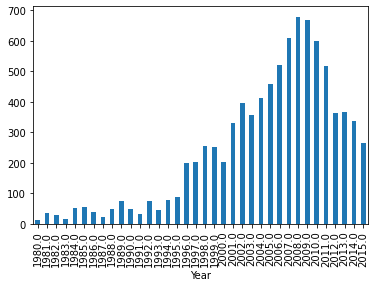

In [87]:
yearsales.to_csv('Datasets/yearsales.csv')
yearsales.plot(kind='bar')

# Pregunta 3
Que juego ha tenido la mayor ganancia globalmente

In [94]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name','Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending =False)
top_game_sale = top_game_sale.set_index("Name")
top_game_sale

,Global_Sales
Name,
Wii Sports,82.74
Super Mario Bros.,40.24
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Tetris,30.26
New Super Mario Bros.,30.01
Wii Play,29.02
New Super Mario Bros. Wii,28.62


<AxesSubplot:xlabel='Name'>

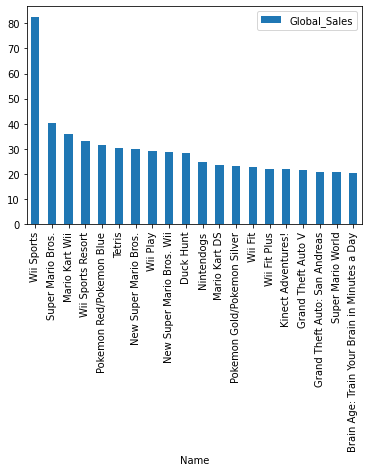

In [92]:
top_game_sale.to_csv('Datasets/top_game_sale.csv')
top_game_sale.plot(kind='bar')

# Pregunta 4
Que empresa ha tenido las mayores ventas a nivel mundial

In [62]:
top_publisher_sale = data.groupby(['Publisher']).Global_Sales.sum().reset_index()
top_publisher_sale = top_publisher_sale.sort_values(by=['Global_Sales'],ascending=False)
top_publisher_sale = top_publisher_sale.set_index("Publisher")
top_publisher_sale = top_publisher_sale.head(20)
top_publisher_sale



,Global_Sales
Publisher,
Nintendo,1780.96
Electronic Arts,1081.14
Activision,717.74
Sony Computer Entertainment,600.72
Ubisoft,463.49
Take-Two Interactive,396.41
THQ,340.44
Konami Digital Entertainment,277.35
Sega,269.89


<AxesSubplot:xlabel='Publisher'>

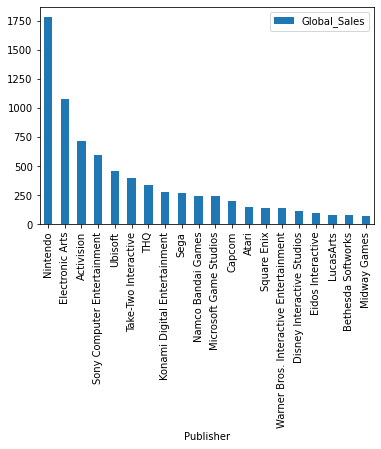

In [64]:
top_publisher_sale.to_csv('Datasets/top_publisher_sale.csv')
top_publisher_sale.plot(kind='bar')

# Pregunta 5
Ganancias Totales por region

In [80]:
top_reg_sales = data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
top_reg_sales = top_reg_sales.sum().reset_index()
top_reg_sales = top_reg_sales.rename(columns={"index": "Region", 0:"Ventas"})
top_reg_sales = top_reg_sales.set_index("Region")
top_reg_sales

,Ventas
Region,
NA_Sales,4304.72
EU_Sales,2379.93
JP_Sales,1270.55
Other_Sales,781.14


<AxesSubplot:xlabel='Region'>

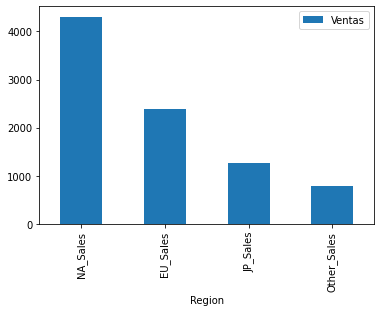

In [82]:
top_reg_sales.to_csv('Datasets/top_reg_sales.csv')
top_reg_sales.plot(kind='bar')
